In [5]:
%matplotlib inline 

from imports import *

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [6]:
problem = CSMRI(img_path='./data/Set12/07.png')

C:\ProgramData\Anaconda3\lib\site-packages\skimage\metrics\simple_metrics.py:160: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)


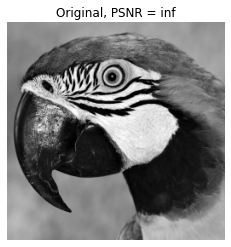

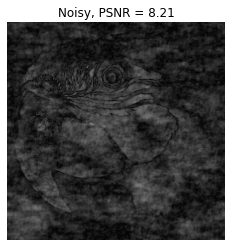

In [7]:
problem = CSMRI(img_path='./data/Set12/07.png')

psnr_display(img_path='./data/Set12/07.png', output=problem.original, title="Original")

psnr_display(img_path='./data/Set12/07.png', output=problem.noisy, title="Noisy")

### Denoising grayscale images with PnP-SVRG

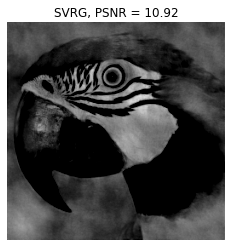

In [8]:
problem = CSMRI(img_path='./data/Set12/07.png')
denoiser = CNNDenoiser(device=device)

svrg_out, svrg_time, svrg_psnr, svrg_zs = pnp_svrg(problem=problem,
                                                   denoiser=denoiser,
                                                   eta=20e3, tt=20, T2=10, 
                                                   mini_batch_size=int(20e3), verbose=False)

psnr_display(img_path='./data/Set12/07.png', output=svrg_out, title="SVRG")

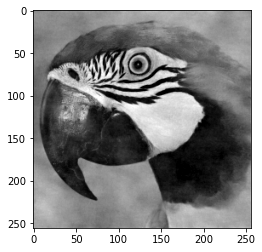

In [4]:
'''
Visualize GIF of denoising
'''

gif(svrg_zs)

### PnP-GD

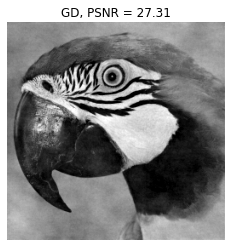

In [5]:
problem = CSMRI(img_path='./data/Set12/07.png')
denoiser = CNNDenoiser(device=device)

gd_out, gd_time, gd_psnr, gd_zs = pnp_gd(problem=problem,
                                         denoiser=denoiser,
                                         eta=40e3, tt=20, verbose=False)

psnr_display(img_path='./data/Set12/07.png', output=gd_out, title="GD")

### PnP-SGD

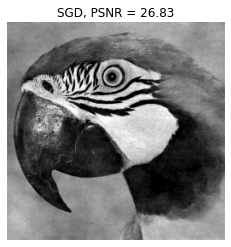

In [6]:
problem = CSMRI(img_path='./data/Set12/07.png')
denoiser = CNNDenoiser(device=device)

sgd_out, sgd_time, sgd_psnr, sgd_zs = pnp_sgd(problem=problem,
                                              denoiser=denoiser,
                                              eta=20e3, tt=20, 
                                              mini_batch_size=int(20e3), verbose=False)

psnr_display(img_path='./data/Set12/07.png', output=sgd_out, title="SGD")

### PnP-LSVRG

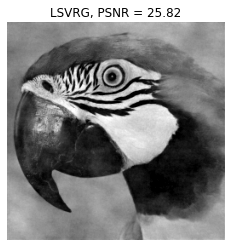

In [7]:
problem = CSMRI(img_path='./data/Set12/07.png')
denoiser = CNNDenoiser(device=device)

lsvrg_out, lsvrg_time, lsvrg_psnr, lsvrg_zs = pnp_lsvrg(problem=problem,
                                                denoiser=denoiser,
                                                eta=20e3, tt=20, 
                                                mini_batch_size=int(20e3), verbose=False)

psnr_display(img_path='./data/Set12/07.png', output=lsvrg_out, title="LSVRG")

### Denoising RGB images with PnP-SVRG

In [2]:
original, noisy, denoised = denoise_rgb(img_path='./flickr30k/train/2594902417.jpg')

/home/abhiram/.local/lib/python3.8/site-packages/skimage/metrics/simple_metrics.py:160: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)


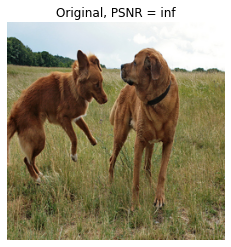

In [3]:
psnr_display(img=original, output=original, title="Original")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


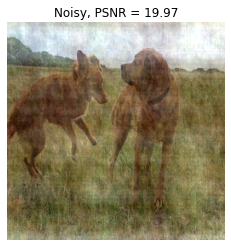

In [4]:
psnr_display(img=original, output=noisy, title="Noisy")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


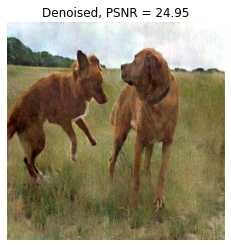

In [5]:
psnr_display(img=original, output=denoised, title="Denoised")

### Some other stuff

In [ ]:
img = np.array(Image.open('./flickr30k/train/2594902417.jpg').resize((256,256)), dtype=int)
imgplot = plt.imshow(img)
plt.show()
print(img.shape)
img = np.array(Image.open('./flickr30k/train/2594902417.jpg').resize((256,256)), dtype=float)

In [ ]:
slice0 = img[:,:,0]
slice1 = img[:,:,1]
slice2 = img[:,:,2]

img0 = np.zeros((256,256,3), 'uint8')
img0[:, :, 0] = slice0
img0[:, :, 1] = slice1
img0[:, :, 2] = slice2

imgplot = plt.imshow(img0)
plt.show()

slice0_res = create_problem(img=img[:,:,0], H=256, W=256, sigma=5)
slice1_res = create_problem(img=img[:,:,1], H=256, W=256, sigma=5)
slice2_res = create_problem(img=img[:,:,2], H=256, W=256, sigma=5)

noisy = np.zeros((256,256,3), 'float')
noisy[:, :, 0] = slice0_res['noisy']
noisy[:, :, 1] = slice1_res['noisy']
noisy[:, :, 2] = slice2_res['noisy']

imgplot = plt.imshow(slice0_res['noisy'])
plt.show()

imgplot = plt.imshow(slice1_res['noisy'])
plt.show()

imgplot = plt.imshow(slice2_res['noisy'])
plt.show()

print(slice0_res['noisy'] - slice2_res['noisy'])
# noisy = np.rollaxis(np.array([slice0_res['noisy'], slice1_res['noisy'], slice2_res['noisy']]), 0, 3)
noisy = (((noisy - noisy.min() ) / (noisy.max() - noisy.min()))*255).astype('uint8')
print(noisy.min(), noisy.max())
# print(noisy.shape)
# noisy = noisy.astype(np.uint8)
print(type(img0[0,0,0]))
print(type(noisy[0,0,0]))
imgplot = plt.imshow(noisy)
plt.savefig('noisy.jpg')
plt.show()

In [ ]:
z_slice0, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(slice0_res, 'nlm', eta=1000, tt=100, T2=15, mini_batch_size=5000, verbose=True)

In [ ]:
z_slice1, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(slice1_res, 'nlm', eta=3000, tt=100, T2=15, mini_batch_size=5000, verbose=True)

In [ ]:
z_slice2, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(slice2_res, 'nlm', eta=3000, tt=100, T2=15, mini_batch_size=5000, verbose=True)

In [ ]:
denoised = np.zeros((256,256,3), 'uint8')
denoised[..., 0] = z_slice0*256
denoised[..., 1] = z_slice1*256
denoised[..., 2] = z_slice2*256
print(denoised.shape)
imgplot = plt.imshow(denoised)
plt.show()